 $\renewcommand{\ket}[1]{|#1\rangle}$

# Pure/Mixed States and Density Matrix

## StateVector
A state of a system gives a complete description of the system. State vectors are a really convenient way to express a pure states of a system. They are expressed inside a bra( $\bra{ \;}$ ) or a ket( $\ket{\;}$ )

Let us see an example, for a one-qubit system in an equal superposition state is given by the state vector 
$$\ket{+} = \frac{1}{\sqrt{2}} (\ket{0}+\ket{1})$$

Information from state vector
- Possible states: $\ket{0}$ and $\ket{1}$
- Probability amplitude associated with each state: 50% each

This state vector gives the complete information of the system.

However, there is a limitation in statevector notation. System are represented as linear superposition of normalized statevector or basis states in statevector notation. There are many other systems that cannot be expressed conveniently by using state vector notations. Only those states called pure states can be conveniently written using a State vector notation. 

## Pure State
“Pure states are those for which we can precisely define their quantum state at every point in time.” Pure states can be written in a form of linear superposition of normalized state vectors.

Consider the previous example: $$\ket{+} = \frac{1}{\sqrt{2}} (\ket{0}+\ket{1}) = \frac{1}{\sqrt{2}}( \begin{bmatrix} 1 \\0 \end{bmatrix}+ \begin{bmatrix} 1 \\0 \end{bmatrix})
 =\begin{bmatrix} \frac{1}{\sqrt{2}} \\\frac{1}{\sqrt{2}}  \end{bmatrix} $$

If we consider  initialization and Hadamard gate is ideal, it is absolutely certain that system is in |+> state. Also, we know that we will get each state with a 50% probability upon measurement in ideal condition. So there is no uncertainty about what the system will evolve and hence is a pure state.




In [2]:
%matplotlib inline
from qiskit.quantum_info import Statevector
from qiskit_textbook.tools import array_to_latex
from qiskit import QuantumCircuit, execute
from qiskit import Aer
from qiskit.visualization import plot_state_qsphere, plot_histogram, plot_bloch_multivector, plot_state_city
backend = Aer.get_backend('statevector_simulator')
simulator= Aer.get_backend('aer_simulator')

<IPython.core.display.Math object>

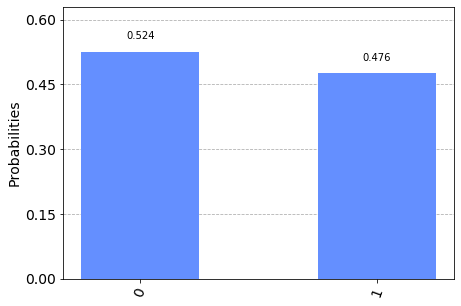

In [3]:
qc_h = QuantumCircuit(1)
qc_h.h(0)
state_h = Statevector.from_instruction(qc_h)
array_to_latex(state_h)
qc_h.measure_all()
counts = execute(qc_h,simulator).result().get_counts()
plot_histogram(counts)

Smilarly a n-qubit pure state will be expressed in state vector notation as: $$ | \psi \rangle = \begin{bmatrix} \alpha_0 \\ \alpha_1 \\ \vdots \\ \alpha_{N-1} \end{bmatrix}, $$

## Mixed state
There are some other systems called mixed states that are different from pure states. They consist of statistical ensembles of different quantum states

Let's go through an example to understand it:

Let us take Bell state as an example: 
$$ \ket{\psi_{AB}}  = \frac{1}{\sqrt{2}} (  \ket{0 0}  + \ket{1 1}  ) = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 0 \\ 0 \\ 1 \end{bmatrix} $$
In state vector, we can see this is a pure state as the total information of the system can be known.

<IPython.core.display.Math object>

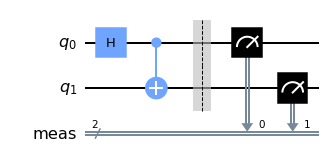

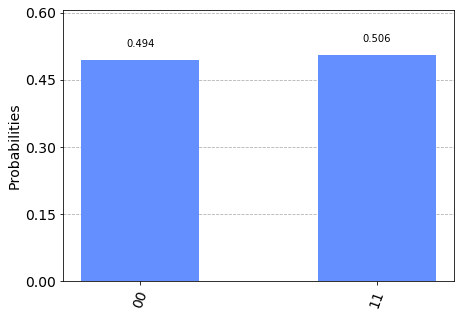

In [4]:
# Bell State Preparation
qc_et = QuantumCircuit(2)
qc_et.h(0)
qc_et.cx(0,1)
state_et = Statevector.from_instruction(qc_et)
array_to_latex(state_et)
qc_et.measure_all()
display(qc_et.draw('mpl'))
counts = execute(qc_et,simulator).result().get_counts()
plot_histogram(counts)

Now let's tweak the experiment by measuring the qubit $q_1$ but not $q_1$. 

<img src=https://qiskit.org/textbook/ch-quantum-hardware/images/bell_and_measure.png width="500">

So we get:
$$\ket{\Psi_{AB}} \xrightarrow[]{\text{Measure } q_1} \ket{\Psi_B}$$

If we measure $q_1$ to be in state $\ket{0}$, $q_0$ would also be in the same state $\ket{0}$. And if measured $\ket{1}$, $q_0$ would be in state $\ket{1}$. And the probability of such occurance is $\frac{1}{2}$.

Say the measurement outcome in $q_1$ is not specific, lets try to represent the state $q_0$ in a general way. 
Here, the state $ \Psi_B$ needs to be represented as an ensemble of multiple quantum states.
 The ensemble of states $ \Psi_B$ is: 
$$
\psi_B \equiv \left \{| \psi_{B_0} \rangle , | \psi_{B_1} \rangle \right \} = \left \{ | 0_B \rangle , | 1_B \rangle \right \},
$$ 
with their classical probability: 
$$ \left \{ p_0, p_1 \right \} = \left \{ 1/2, 1/2 \right \} $$
Hence $ \Psi_B$ is a <b>mixed state</b>. 

This representation of state $\psi_B$ seems valid. But when we look into system with ensemble of n different states,it starts to seems really inconvenient:
$$
\left \{ |\psi_j \rangle \right \}_{j = 1}^n = \left \{ | \psi_1 \rangle, | \psi_2 \rangle, \dots, | \psi_n \rangle \right \},
$$ 
with their classical probabilities: 
$$
\left \{ p_j \right \}_{j = 1}^n = \left \{ p_1, p_2, \dots, p_n \right \}
$$

This when we start to see the limitation of statevector representation. It starts to get difficult to track the whole ensemble of states. It gets much more difficult when we apply any gate to the ensemble. 

# Density Matrix
To overcome this limitation, we use a different kind of notation called density matrix notation.

A mixed state, consisting of several possible outcome pure normalized states $|\psi_j \rangle$ , each with probability of occurrence $p_j$, is defined by a density matrix of the form:

$$ \rho \equiv \sum_{j} p_j |\psi_j \rangle \langle \psi_j | $$

For pure states, there is only one $\psi_j$ and $p_j =1$. Density matrix can be considered as a general matrix to describe a quantum state of a system.

For mixed states like $\Psi_B$, we use the states and their probabilities of occurrence to construct density matrix as follows: 
$$ 
\begin{aligned}
\rho_B & = \frac{1}{2} | 0_B \rangle \langle 0_B | + \frac{1}{2} | 1_B \rangle \langle 1_B |
\\
\\
& = \frac{1}{2} \begin{bmatrix} 1 & 0 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} + \frac{1}{2} \begin{bmatrix} 0 & 1 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} 
\\
\\
& = \frac{1}{2} \begin{bmatrix} 1 & 0 \\ 0 & 0 \end{bmatrix} + \frac{1}{2} \begin{bmatrix} 0 & 0 \\ 0 & 1 \end{bmatrix} 
\\
\\
& = \frac{1}{2} \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}
\end{aligned}
$$



### Calculate mixed state of $\ket{\phi_{AB}}(Bell State)$

The density matrix representation for this state is then given by:

$$ 
\begin{aligned}
& \rho_{AB}  = | \psi_{AB} \rangle \langle \psi_{AB} |
\\
\\
& \rho_{AB} = \left ( \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 0 \\ 0 \\ 1 \end{bmatrix} \right ) \left ( \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 0 & 0 & 1 \end{bmatrix} \right )
\\
\\
& \rho_{AB} = \frac{1}{2} \begin{bmatrix} 1 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 1 & 0 & 0 & 1 \\ \end{bmatrix}
\end{aligned}
$$

<IPython.core.display.Math object>

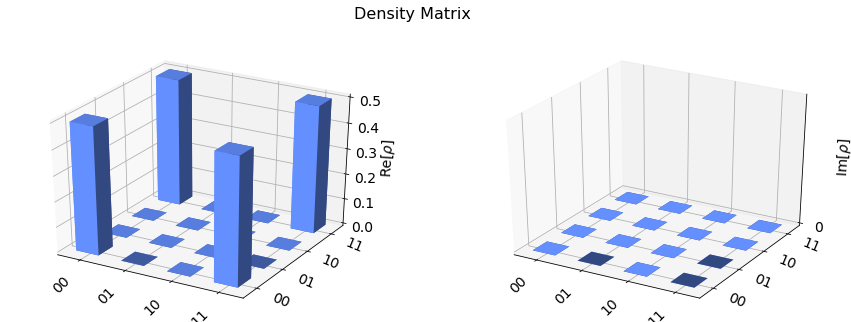

In [5]:
from qiskit.quantum_info import DensityMatrix

# Density matrix of Bell State Preparation
qc_et = QuantumCircuit(2)
qc_et.h(0)
qc_et.cx(0,1)
state_et = DensityMatrix.from_instruction(qc_et)
array_to_latex(state_et, pretext ='Density Matrix')
plot_state_city(state_et.data, title='Density Matrix')

## Example of a mixed State
The current status of real quantum devices are far from ideal. They are prone to errors and many have low decoherence time. Let us consider a system with a faulty Hadamard gate such that 20% of the time, it rotates the qubit either too short or too much by $30^{\circ}$($\pi/6) about x axis. The ensemble of the mixed state contain following states:

$$ | \psi_1 \rangle = \frac{1}{\sqrt{2}} \left( | 0 \rangle  + | 1 \rangle  \right) $$
$$ | \psi_2 \rangle = \frac{\sqrt{3}}{2}| 0 \rangle  + \frac{1}{2} | 1 \rangle $$
$$ | \psi_3 \rangle = \frac{1}{2} | 0 \rangle  + \frac{\sqrt{3}}{2} | 1 \rangle $$

with probability of occurance:
{p_0,p_2,p_3} = {80%,10%,10%}


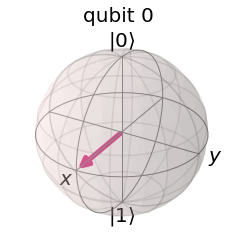

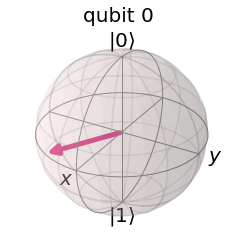

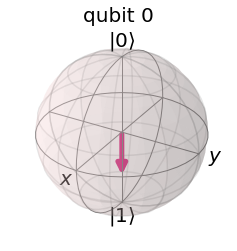

In [6]:
from math import pi as pi

qc1 = QuantumCircuit(1)
# create state psi_1
qc1.h(0)
# create state psi_2
qc2 = QuantumCircuit(1)
qc2.rx(pi-pi/6,0)
qc2.ry(-pi/2,0)

# create state psi_3
qc3 = QuantumCircuit(1)
qc3.rx(pi+pi/6,0)
qc3.ry(-pi/2,0)

psi1= Statevector.from_instruction(qc1)
display(plot_bloch_multivector(psi1))

psi2= Statevector.from_instruction(qc2)
display(plot_bloch_multivector(psi2))

psi3= Statevector.from_instruction(qc3)
display(plot_bloch_multivector(psi3))


We construct the density matrix of the state as:
$$ \rho_H = \frac{4}{5} | \psi_1 \rangle \langle \psi_1 | + \frac{1}{10} | \psi_2 \rangle \langle \psi_2 | + \frac{1}{10} | \psi_3 \rangle \langle \psi_3 | $$
$$
\begin{aligned}
& \rho_H = \frac{4}{5} \begin{bmatrix} \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} \end{bmatrix} + \frac{1}{10} \begin{bmatrix} \frac{3}{4} & \frac{\sqrt{3}}{4} \\ \frac{\sqrt{3}}{4} & \frac{1}{4} \end{bmatrix} + \frac{1}{10} \begin{bmatrix} \frac{1}{4} & \frac{\sqrt{3}}{4} \\ \frac{\sqrt{3}}{4} & \frac{3}{4} \end{bmatrix}
\\
\\
& \rho_H = \begin{bmatrix} \frac{1}{2} & \frac{\sqrt{3}}{20} + \frac{2}{5} \\ \frac{\sqrt{3}}{20} + \frac{2}{5} & \frac{1}{2} \end{bmatrix}
\end{aligned}
$$


In [7]:
import numpy as np
rho = np.array([[1/2,np.sqrt(3)/20 + 2/5],[np.sqrt(3)/20 + 2/5,1/2]])
psi= DensityMatrix(rho)
array_to_latex(psi)

<IPython.core.display.Math object>

Some properties of Density matrix 
- Pure State has $tr(\rho^2) = 1$
- Mixed State has $tr(\rho^2) \leq 1$

- Evolution of the mixed state/system with an unitary matrix $\hat U$ is given by 
$$ 
\rho = \sum_{j} p_j |\psi_j \rangle \langle \psi_j | \enspace \xrightarrow[]{\enspace \hat U \enspace} \enspace \rho' = \sum_{j} p_j \hat U |\psi_j \rangle \langle \psi_j | \hat U^{\dagger} = \hat U \rho \hat U^{\dagger}
$$

In [8]:
# compute Trace of density matrix
rho_sq = np.dot(state_et.data,state_et.data)
np.trace(rho_sq)

(0.9999999999999996+0j)

In [9]:
import qiskit.tools.jupyter
%qiskit_version_table

/home/namahyp/anaconda3/lib/python3.7/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
